In [ ]:
pip install import_ipynb

In [ ]:
import import_ipynb
import Distance_Matrix

In [3]:
#Libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import copy

#Algorithm A*


**Algorithm A*** is a graph search algorithm that uses heuristics to find the shortest path between two nodes. It involves the simultaneous expansion of nodes based on the cost of reaching them and a heuristic estimation of the cost of reaching the goal. The algorithm tries to minimize the sum of the actual cost of reaching the node and the heuristic estimate of the cost remaining to the destination, which leads to finding the optimal path in an efficient manner.


###Heuristics


In [4]:
# This heuristic function returns the distance from city x to city y plus the average distance from city y to the remaining possible cities to travel to (non-optimal).
def heuristic_mean(distance_matrix, paths):

  n = len(distance_matrix)
  heuristic = []

  for i in range(len(paths)):
      found_valid_city = False
      current_city = paths[i][0][-1]
      z = len(paths[i][0])
      current_distance = 0

      for j in range(z-1):
        current_distance += distance_matrix[paths[i][0][j]][paths[i][0][j+1]]

      sum_dist = 0
      k = 0

      for city in range(n):
        if city not in paths[i][0] and distance_matrix[current_city][city] != -1:
          k += 1
          found_valid_city = True
          sum_dist += distance_matrix[current_city][city]

      if found_valid_city == True:
        value = (sum_dist/k) * (n - z + 1)
        heuristic.append(current_distance + value)
      elif found_valid_city == False and distance_matrix[current_city][0] != -1:
        heuristic.append(current_distance + distance_matrix[current_city][0])
      elif found_valid_city == False:
        heuristic.append(float('inf'))

  return heuristic

In [5]:
# This heuristic function returns the distance from city x to city y plus the minimum distance from the remaining cities to the starting city (optimal).
def heuristic_min(distance_matrix, paths):

  n = len(distance_matrix)
  heuristic = []

  for i in range(len(paths)):
      found_valid_city = False
      current_city = paths[i][0][-1]
      z = len(paths[i][0])
      current_distance = 0

      for j in range(z-1):
        current_distance += distance_matrix[paths[i][0][j]][paths[i][0][j+1]]

      k = n - z + 1
      min_distance = float("inf")
      nearest_city = None

      for city in range(n):
        if city not in paths[i][0] and distance_matrix[city][0] != -1:
          found_valid_city = True
          if distance_matrix[city][0] < min_distance:
            min_distance = distance_matrix[city][0]

      if found_valid_city == True:
        heuristic.append(current_distance + min_distance * k)
      elif found_valid_city == False and distance_matrix[current_city][0] != -1:
        heuristic.append(current_distance + distance_matrix[current_city][0])
      elif found_valid_city == False:
        heuristic.append(float('inf'))

  return heuristic

###Algorithm A*


In [6]:
def A_star(distance_matrix, heuristic_function):
  n = len(distance_matrix)
  current_city = 0  # Start form city 0
  visited = [current_city]
  paths = []
  akt_distance = float('inf')
  sorted_paths = []
  current_distance = 0

  while len(visited) < n+1:

    for city in range(n):
      if city not in visited and distance_matrix[current_city][city] != -1:
        akt_distance = current_distance + distance_matrix[current_city][city]
        paths.append([visited + [city], akt_distance])

    calc_paths = copy.deepcopy(paths)
    heuristic = []
    heuristic = heuristic_function(distance_matrix, paths)

    for i in range(len(paths)):
      paths[i][1] = heuristic[i]

    paths = [path for path in paths if path[1] != float('inf') and path[1] is not None] # Remove impossible paths

    for path in paths:
        sorted_paths.append(path)

    sorted_paths = sorted(sorted_paths, key=lambda x: x[1]) # Sort by heuristic value
    if len(sorted_paths) == 0:
      return("Brak możliwości przejazdu")
      break

    visited = sorted_paths[0][0]

    for i in range(len(visited)-1):
      current_distance = distance_matrix[visited[i]][visited[i+1]]

    if len(visited) == n:
      visited.append(0)
      total_dist = 0
      for i in range(n):
        total_dist += distance_matrix[visited[i]][visited[i+1]]
      return(visited, total_dist)

    sorted_paths.pop(0)
    current_city = visited[-1]
    paths = []

##Comparison with time


In [7]:
random.seed(254468)

times_A_star_mean = []
times_A_star_min = []

for i in range(4, 11):

  print(f"Results for {i} cities:")

  points = Distance_Matrix.coordinates(i)
  distance_matrix = Distance_Matrix.generate_distance_matrix(points)

  start = time.time()
  print(f"Result of A_star with heuristic_mean function (optimal): {A_star(distance_matrix, heuristic_mean)}")
  end = time.time()
  times_A_star_mean.append(end - start)

  start = time.time()
  print(f"Result of A_star with heuristic_min function (non-optimal): {A_star(distance_matrix, heuristic_min)}")
  end = time.time()
  times_A_star_min.append(end - start)

  print("")

Results for 4 cities:
Result of A_star with heuristic_mean function (optimal): ([0, 1, 2, 3, 0], 447.40753503738745)
Result of A_star with heuristic_min function (non-optimal): ([0, 2, 3, 1, 0], 427.9051474450652)

Results for 5 cities:
Result of A_star with heuristic_mean function (optimal): ([0, 1, 4, 2, 3, 0], 405.1440613871821)
Result of A_star with heuristic_min function (non-optimal): ([0, 1, 4, 2, 3, 0], 405.1440613871821)

Results for 6 cities:
Result of A_star with heuristic_mean function (optimal): ([0, 1, 5, 3, 4, 2, 0], 519.2632204750555)
Result of A_star with heuristic_min function (non-optimal): ([0, 1, 5, 4, 3, 2, 0], 513.6733137811678)

Results for 7 cities:
Result of A_star with heuristic_mean function (optimal): ([0, 4, 6, 3, 5, 2, 1, 0], 608.8778311503838)
Result of A_star with heuristic_min function (non-optimal): ([0, 5, 3, 4, 6, 2, 1, 0], 566.7494637628001)

Results for 8 cities:
Result of A_star with heuristic_mean function (optimal): ([0, 4, 7, 1, 5, 2, 3, 6, 0]

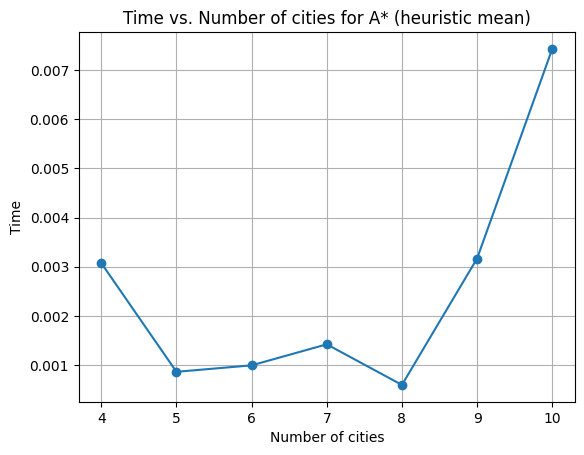

In [8]:
i_values = range(4, 11)

plt.plot(i_values, times_A_star_mean, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of cities for A* (heuristic mean)')

plt.grid(True)

plt.show()

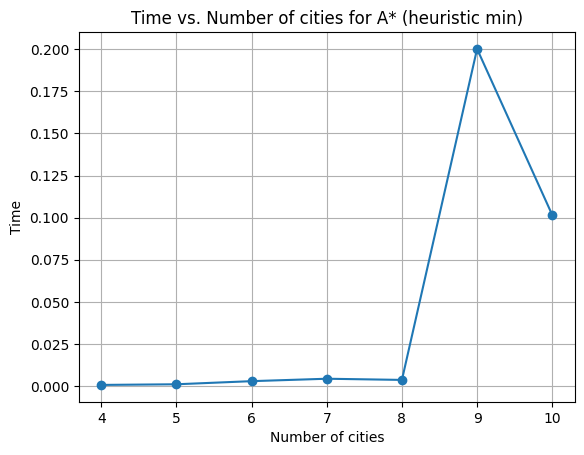

In [9]:
i_values = range(4, 11)

plt.plot(i_values, times_A_star_min, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of cities for A* (heuristic min)')

plt.grid(True)

plt.show()